# 1.数据预处理

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
basket=pd.read_csv("Basket-2018-06-01-2018-07-05.csv")

In [8]:
basket.isnull()#查看所有缺失值
basket2=data.dropna()
print(basket2)

       SHOP_DATETIME STORE_CODE  POS_NO  BASK_CODE  BASK_SPEND
0         2018-06-01       D007       3     250458        8.00
1         2018-06-01       D007       3     250200       32.70
2         2018-06-01       D007       1     161068       16.80
3         2018-06-01       D007       8       5325       30.40
4         2018-06-01       D007       8       5361      191.30
...              ...        ...     ...        ...         ...
571547    2018-07-05       A010       2     284211       34.71
571548    2018-07-05       A010       2     284601       44.80
571549    2018-07-05       A010       2     284241        6.50
571550    2018-07-05       A010       2     284352       15.90
571551    2018-07-05       A010       2     284265       43.20

[571552 rows x 5 columns]


In [9]:
#数据大小
basket2.shape
#数据分布情况
basket2.describe()

,POS_NO,BASK_CODE,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


In [19]:
basket2=basket2[basket2['BASK_SPEND']>0]  #剔除data中bask_spend列小于0的行

In [21]:
basket2.describe()

,POS_NO,BASK_CODE,BASK_SPEND,year
count,569797.000000,569797.000000,569797.000000,569797.0
mean,2.994330,167572.136898,39.583197,2018.0
std,2.502507,87224.915886,196.158166,0.0
min,1.000000,961.000000,0.010000,2018.0
25%,1.000000,90673.000000,9.000000,2018.0
50%,2.000000,177692.000000,20.000000,2018.0
75%,3.000000,238933.000000,44.800000,2018.0
max,20.000000,323914.000000,79920.000000,2018.0


In [32]:
basket2["SHOP_DATETIME"] = pd.to_datetime(basket2["SHOP_DATETIME"])#将下单日期改为datetime类型
basket2['year'] = basket2["SHOP_DATETIME"].dt.year
basket2['month'] = basket2['SHOP_DATETIME'].dt.month
basket2['day']= basket2['SHOP_DATETIME'].values.astype('datetime64[D]')#方便后续的分析，新增加年份列和月份列

D:\program\ananconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\program\ananconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\program\ananconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [33]:
basket2

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND,year,month,day
0,2018-06-01,D007,3,250458,8.00,2018,6,2018-06-01
1,2018-06-01,D007,3,250200,32.70,2018,6,2018-06-01
2,2018-06-01,D007,1,161068,16.80,2018,6,2018-06-01
3,2018-06-01,D007,8,5325,30.40,2018,6,2018-06-01
4,2018-06-01,D007,8,5361,191.30,2018,6,2018-06-01
...,...,...,...,...,...,...,...,...
571547,2018-07-05,A010,2,284211,34.71,2018,7,2018-07-05
571548,2018-07-05,A010,2,284601,44.80,2018,7,2018-07-05
571549,2018-07-05,A010,2,284241,6.50,2018,7,2018-07-05
571550,2018-07-05,A010,2,284352,15.90,2018,7,2018-07-05


# 2.销售额分析

## 2.1每日销售额求和 

In [43]:
# 整体销售情况子数据集，包含下单日期、销售额、年份、月份信息
sales_data = basket2[['SHOP_DATETIME','BASK_SPEND','month','day']]
#按照年份、月份对销售子数据集进行分组求和
sales_year = sales_data.groupby(['month','day']).sum()
sales_year.style.background_gradient()# 颜色越深，销售额越高
#按周六日呈周期性递增态势

##  按商店的销售额分析

In [77]:
Market_Sales = basket2.groupby('STORE_CODE')['BASK_SPEND'].sum().reset_index().sort_values(by = 'BASK_SPEND',ascending = False)
Market_Sales["percent"] = Market_Sales["BASK_SPEND"] / basket2["BASK_SPEND"].sum()
#Market_Sales.sort_values(ascending=False)
#productId_amount = df.groupby('Product_ID').sum()['Sales'].sort_values(ascending=False)
Market_Sales.style.background_gradient()

,STORE_CODE,BASK_SPEND,percent
0,A001,3478347.859999,0.154220
15,D002,3177384.759999,0.140877
20,D007,1382203.010000,0.061283
4,A008,1324641.100000,0.058731
8,A013,1126550.930000,0.049948
2,A006,943923.310000,0.041851
7,A012,854660.960000,0.037893
17,D004,815338.800000,0.036150
19,D006,814436.490000,0.036110
5,A009,805212.890000,0.035701


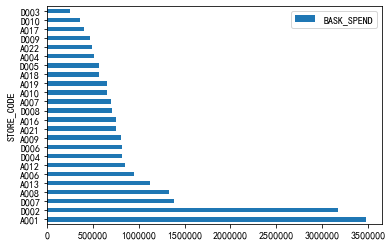

In [96]:
a=basket2.groupby('STORE_CODE')['BASK_SPEND'].sum().reset_index().sort_values(by = 'BASK_SPEND',ascending = False)#商店按消费额大小排序
a.set_index('STORE_CODE',inplace=True)
#plt.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['axes.unicode_minus'] = False
#plt.xlabel('消费总额')
a.plot(kind='barh')

## 商店按结账频数统计 

In [70]:
basket2.loc[:,'STORE_CODE'].value_counts()#商店按结账次数大小排序

A001    66507
D002    62949
D007    37503
A008    36462
A013    30064
A006    28470
A012    24946
A009    21809
D004    21362
D008    21029
A021    20555
A010    19543
D006    18572
A016    18279
A007    17954
A019    16985
D009    15827
A018    15731
D005    15261
A022    15260
A004    13429
A017    12459
D010    11070
D003     7771
Name: STORE_CODE, dtype: int64

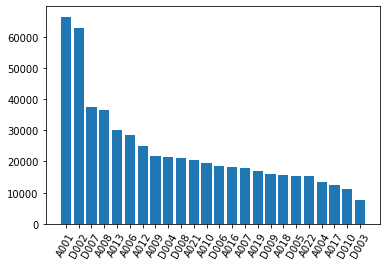

In [71]:
import numpy as np
import matplotlib.pyplot as plt
count =basket2.loc[:,'STORE_CODE'].value_counts()
name = list(count.index)
plt.bar(np.arange(len(name)), count)
# 设置横坐标
plt.xticks(np.arange(len(name)), name, rotation=60)   # rotation 旋转横坐标标签
plt.show()

# 顾客分析

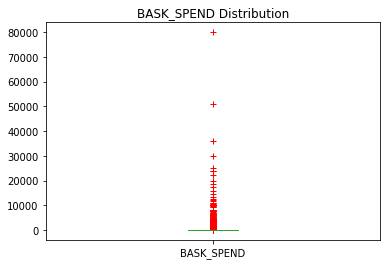

In [72]:
datatemp2=basket2["BASK_SPEND"]
datatemp2.plot(kind='box',title='BASK_SPEND Distribution',sym='r+');

(array([287136., 124141.,  61781.,  33267.,  20008.]),
 array([1.0000e-02, 2.0006e+01, 4.0002e+01, 5.9998e+01, 7.9994e+01,
        9.9990e+01]),
 <a list of 5 Patch objects>)

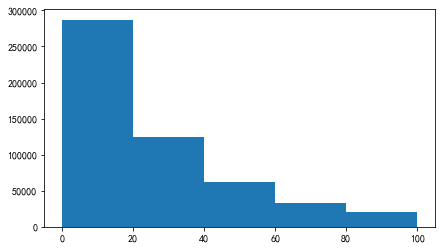

In [99]:
basket3=basket2[basket2['BASK_SPEND']<100]  #剔除离群点
dataset1 = basket3["BASK_SPEND"]
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7, 4))
ax.hist(dataset1, bins=5)

# item数据集

In [2]:
import pandas as pd #导入pandas模块
item=pd.read_csv("item.csv")
item['SDATE']=pd.to_datetime(item['SDATE'])
item.isnull().any()#查看所有缺失值

SDATE              False
STORE_CODE         False
POSID              False
BASK_CODE          False
PROD_CODE          False
ITEM_QUANTITY      False
ITEM_SPEND         False
NORMAL_PRICE       False
DISCOUNT_TYPE      False
DISCOUNT_AMOUNT    False
dtype: bool

In [3]:
item.describe()#查看数据分布情况

,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06
mean,2.994959e+00,1.659824e+05,1.144861e+05,1.436702e+00,1.285536e+01,1.424412e+01,-1.624232e+00
std,2.470286e+00,8.583102e+04,8.161988e+04,7.015504e+00,1.022148e+02,2.403937e+01,5.160490e+01
min,1.000000e+00,9.610000e+02,1.900000e+01,-6.000000e+02,-3.594000e+04,5.000000e-01,-5.760000e+04
25%,1.000000e+00,8.995200e+04,2.183500e+04,1.000000e+00,3.800000e+00,3.800000e+00,-1.000000e+00
50%,2.000000e+00,1.758280e+05,1.233210e+05,1.000000e+00,7.000000e+00,7.800000e+00,0.000000e+00
75%,3.000000e+00,2.229530e+05,1.959930e+05,1.000000e+00,1.200000e+01,1.500000e+01,0.000000e+00
max,2.000000e+01,3.239140e+05,2.250470e+05,4.020000e+03,6.912000e+04,1.980000e+03,9.300000e+02


In [9]:
item1=item[item['ITEM_SPEND']>0]  #剔除basket中bask_spend列小于0的行
item1.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


In [10]:
item1.duplicated().sum()#查看是否有重复值

212634

In [11]:
item2 = item1.drop_duplicates(keep='first')#去掉重复行，并保留重复出现的行中第一次出现的行
item2.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


# 产品分析

In [12]:
item2['year'] = item2['SDATE'].dt.year          
item2['month'] = item2['SDATE'].dt.month
item2['day']= item2['SDATE'].values.astype('datetime64[D]')#方便后续的分析，新增加年份列和月份列

D:\program\ananconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\program\ananconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\program\ananconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [16]:
#按商品货号分组，对商品数量进行求和，从大到小进行排序，得到销售量前十的商品
a=item2.groupby('PROD_CODE')['ITEM_QUANTITY'].sum().reset_index().sort_values(by = 'ITEM_QUANTITY',ascending = False)#商店按消费额大小排序
a.head(10)

,PROD_CODE,ITEM_QUANTITY
8528,149413,37718.000
5316,86772,28661.000
17200,220834,24139.000
1478,7133,21673.000
3883,61623,21318.000
7131,124556,18775.000
12011,194690,18124.336
301,1152,17679.000
7129,124554,15717.000
1480,7137,15284.000


In [17]:
#按商品货号分组，对销售金额进行求和，从大到小进行排序，得到交易额前十的商品
item2['sales'] = item2['ITEM_QUANTITY']*item2['ITEM_SPEND']
b=item2.groupby('PROD_CODE')['sales'].sum().sort_values(ascending=False)
b.head(10)

D:\program\ananconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


PROD_CODE
220834    6.570246e+07
149413    5.511544e+07
7137      5.361133e+07
101421    4.113461e+07
11929     3.062564e+07
7133      2.570728e+07
220320    1.659394e+07
199639    1.496307e+07
1157      1.232104e+07
199628    1.165345e+07
Name: sales, dtype: float64

In [18]:
#客单价，即平均交易金额，是指平均每个客户交易金额，客单价等于成交金额/成交用户数。
#销售额是由客单价和用户数所决定的，要提升产品的销售额，除了尽可能多地吸引客流，增加顾客交易次数以外，提高客单价也是非常重要的途径。
sumPrice=item2['sales'].sum()
countID=item2['SDATE'].count()
avgPrice = sumPrice/countID
print(avgPrice)

319.0616616276885


In [20]:
c=item2.groupby('DISCOUNT_TYPE')['ITEM_SPEND'].sum().reset_index().sort_values(by = 'ITEM_SPEND',ascending = False)#销售量按照折扣进行分组并进行大小排序
c

,DISCOUNT_TYPE,ITEM_SPEND
3,n,1.370066e+07
4,p,4.992685e+06
2,m,1.954608e+06
7,v,1.910762e+05
8,x,9.161940e+04
5,q,4.618240e+04
0,Z,2.479515e+04
6,s,9.524600e+02
1,h,2.150000e+01


In [21]:
d=item2.groupby('DISCOUNT_TYPE')['ITEM_QUANTITY'].sum().reset_index().sort_values(by = 'ITEM_QUANTITY',ascending = False)#销售量按照折扣进行分组并进行大小排序
d

,DISCOUNT_TYPE,ITEM_QUANTITY
3,n,1496487.735
4,p,462201.611
2,m,265343.962
7,v,13264.000
8,x,9687.000
0,Z,2164.472
5,q,1122.000
6,s,224.506
1,h,1.000


In [23]:
grouped_Customer = item2[['BASK_CODE','SDATE', 'ITEM_QUANTITY', 'sales', 'month']].sort_values(['SDATE']).groupby('BASK_CODE')

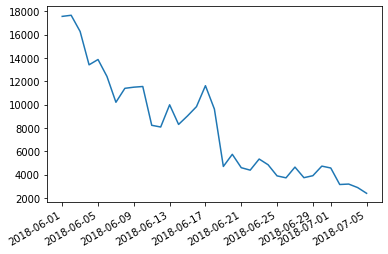

In [24]:
grouped_Customer.min().SDATE.value_counts().plot()   #用户的第一次购买日期分布，可以看出在7月之后用户增长缓

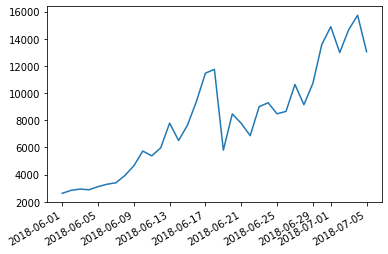

In [25]:
grouped_Customer.max().SDATE.value_counts().plot()   #用户最后一次购买日期分布,发现用户基本没有流失，也验证了每年销售额的增长趋势

In [26]:
# 统计每个客户第一次和最后一次购买记录
Customer_life = grouped_Customer.SDATE.agg(['min','max'])
# 查看只有一次购买记录的顾客数量，第一次和最后一次是同一条记录，则说明购买只有一次(这里将一个购物篮看做一个顾客)
(Customer_life['min'] == Customer_life['max']).value_counts()

False    169535
True     111281
dtype: int64